In [1]:
# unzip zipped files
import pandas as pd
import zipfile

In [2]:
with zipfile.ZipFile('./ml100-03-final.zip', 'r') as zipObj:
    zipObj.extractall()

In [3]:
#讀取image_size
import cv2

In [4]:
img = cv2.imread('./image_data/train/daisy/01ec22f3f0076cb484b44918090be739.jpg')

In [5]:
print(img.shape)

(180, 240, 3)


In [6]:
#import all related codes
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense

In [173]:
#loading_dataset
train_path = './image_data/train'
test_path = './image_data'
batch_size = 128
datagen = ImageDataGenerator(validation_split=0.2)
train_batchs = datagen.flow_from_directory(train_path, 
                                           target_size=(224, 224),
                                           classes=['daisy','dandelion','rose','sunflower','tulip'],
                                           batch_size=batch_size,
                                           subset='training')

validation_batchs = datagen.flow_from_directory(train_path, 
                                           target_size=(224, 224),
                                           classes=['daisy','dandelion','rose','sunflower','tulip'],
                                           batch_size=batch_size,
                                           subset='validation')

test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                        target_size=(224, 224),
                                                
                                                        class_mode='categorical',
                                                        batch_size=1)

Found 2260 images belonging to 5 classes.
Found 563 images belonging to 5 classes.
Found 4823 images belonging to 2 classes.


In [73]:
print(train_batchs.image_shape)

(224, 224, 3)


In [69]:
#show_image
def img_combine(img, ncols=8, size=2, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img[0])
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[0].astype('int')[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[0].astype('int')[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[0].astype('int')[nth], cmap='rainbow', vmin=0, vmax=1)
                    ax.set_title(img[1][nth], fontsize=12)
                ax.set_axis_off()
    plt.tight_layout()
    plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


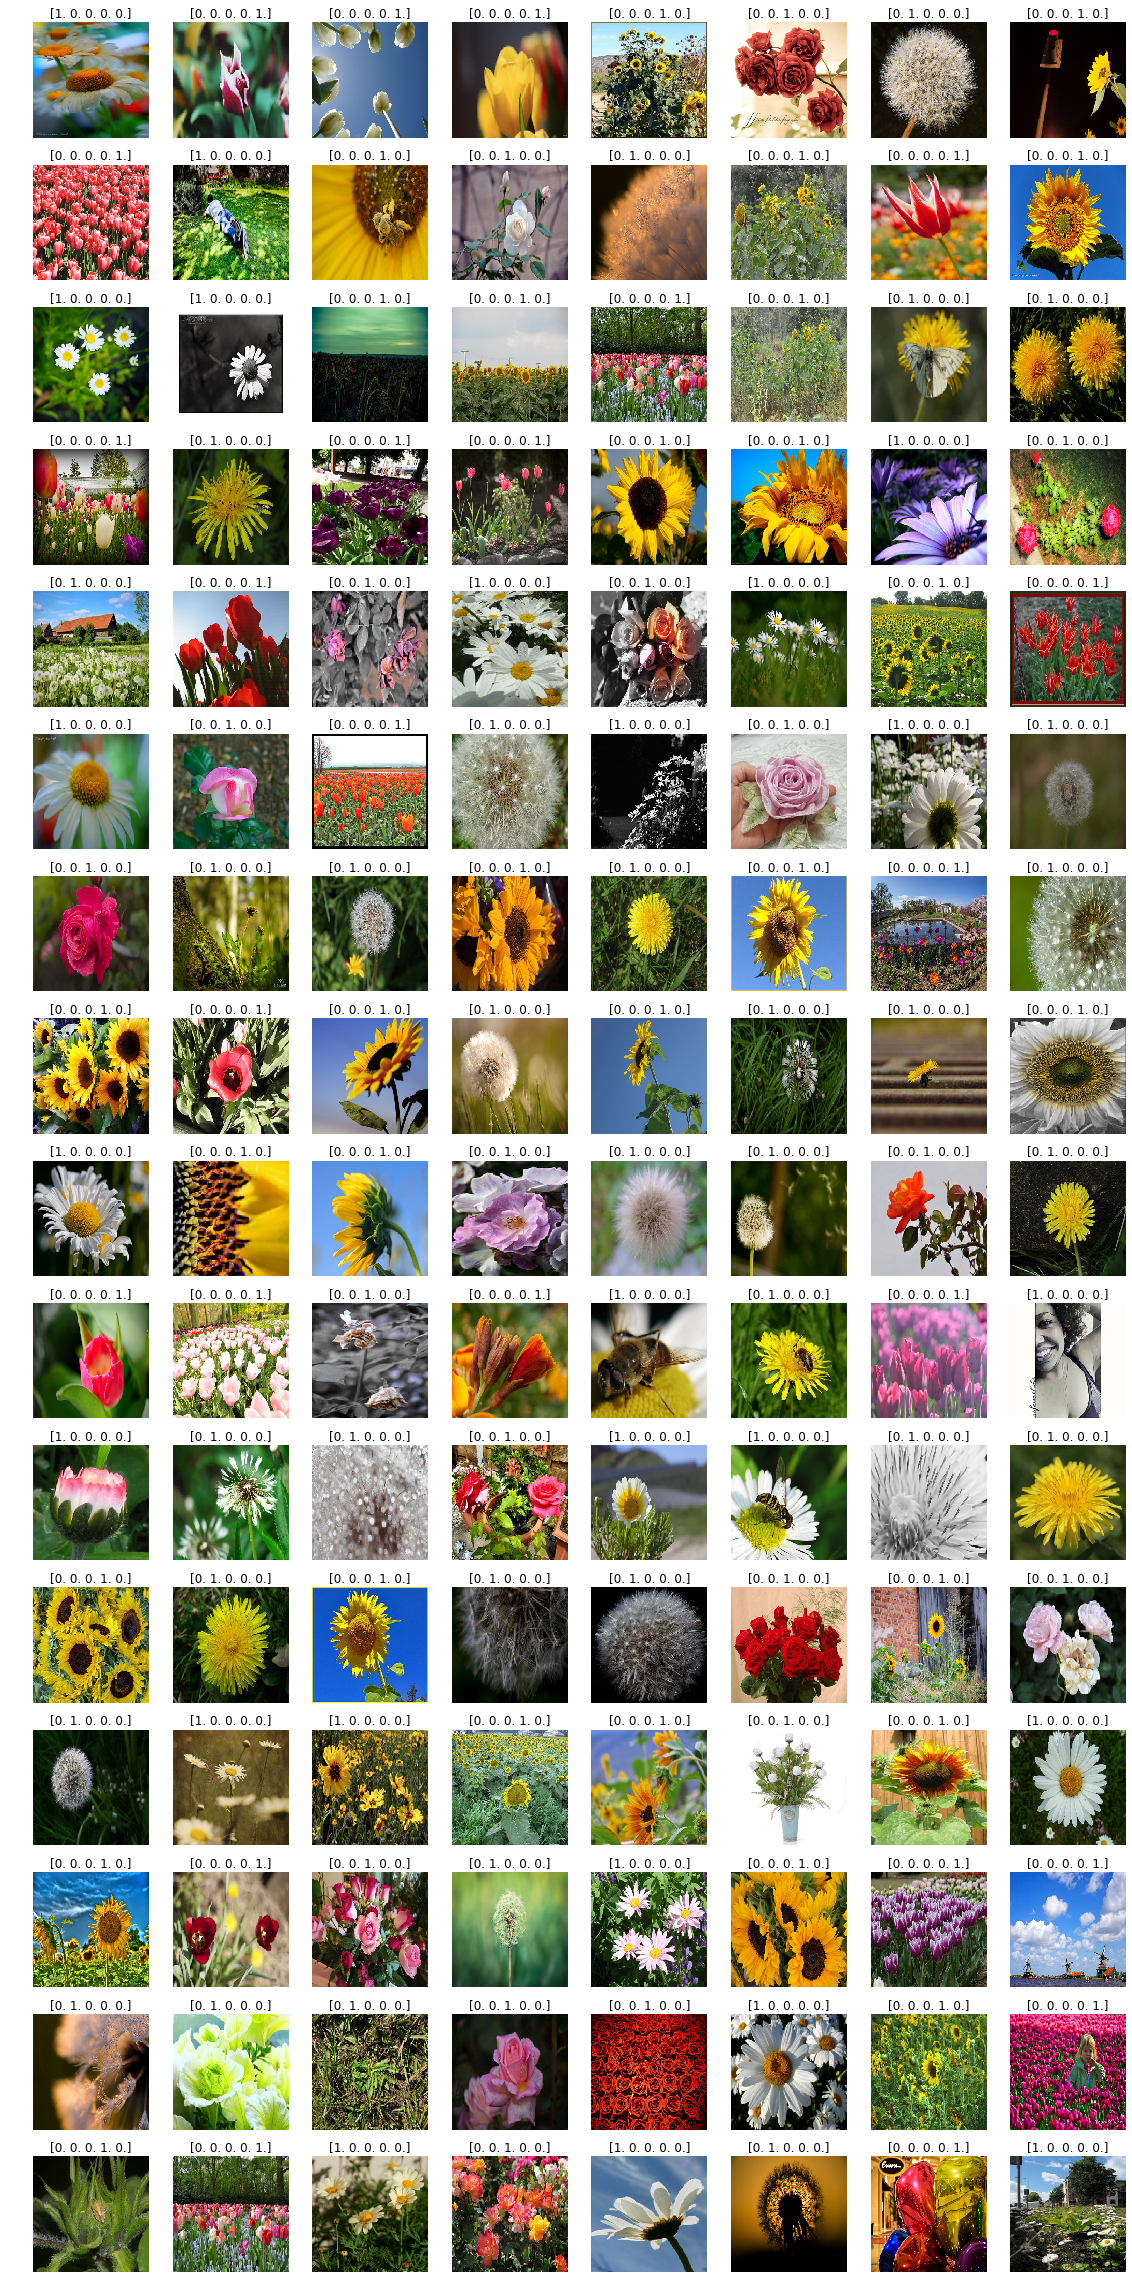

In [74]:
img_combine(next(train_batchs)) #train_batches是tuple要記得indexing

In [76]:
#transfer_learning
from keras import applications
vgg16_model = applications.vgg16.VGG16()

In [121]:
vgg16_model.layers[0]

In [ ]:
from keras.layers.core import Dense

In [130]:
#build model
model = Sequential()

#add layers into the model except for the last layer
for nth in range(len(vgg16_model.layers)-1):
    model.add(vgg16_model.layers[nth])
model.summary()

for layer in model.layers:
    layer.trainable = False

#add prediction layer
model.summary()
model.add(Dense(5, activation='softmax', name='prediction'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [137]:
#training model
model.compile(RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit_generator(train_batchs,
                    steps_per_epoch=train_batchs.samples/batch_size,
                    validation_data=validation_batchs,
                    epochs=10)

Epoch 1/10
18/17 [==============================] - 648s 36s/step - loss: 1.3105 - accuracy: 0.6261 - val_loss: 0.5710 - val_accuracy: 0.8099
Epoch 2/10
18/17 [==============================] - 705s 39s/step - loss: 0.6228 - accuracy: 0.7858 - val_loss: 0.5242 - val_accuracy: 0.8117
Epoch 3/10
18/17 [==============================] - 661s 37s/step - loss: 0.4946 - accuracy: 0.8239 - val_loss: 0.4936 - val_accuracy: 0.8419
Epoch 4/10
18/17 [==============================] - 654s 36s/step - loss: 0.3588 - accuracy: 0.8730 - val_loss: 0.5026 - val_accuracy: 0.8313
Epoch 5/10
18/17 [==============================] - 637s 35s/step - loss: 0.3834 - accuracy: 0.8566 - val_loss: 0.5810 - val_accuracy: 0.8099
Epoch 6/10
18/17 [==============================] - 642s 36s/step - loss: 0.2914 - accuracy: 0.8925 - val_loss: 0.4621 - val_accuracy: 0.8544
Epoch 7/10
18/17 [==============================] - 639s 36s/step - loss: 0.2330 - accuracy: 0.9146 - val_loss: 0.4631 - val_accuracy: 0.8615
Epoch 

In [139]:
model.save("vgg_16_transfer_learning.h5")

In [155]:
test_batches.image_shape

(224, 224, 3)

In [190]:
import glob
import os

f_names = glob.glob('./image_data/test/'+ '*.jpg')
img = []
len(f_names)

2000

In [189]:
pwd

'/Users/sheng-chih/Documents/GitHub/3rd-ML100Days/homework/D101-103'

In [191]:
from keras.preprocessing import image
img = []
for i in range(len(f_names)):
    images = image.load_img(f_names[i], target_size=(224, 224))
    x = image.img_to_array(images)
    x = np.expand_dims(x, axis=0)
    img.append(x)
    print('loading no.%s image' %i)

loading no.0 image
loading no.1 image
loading no.2 image
loading no.3 image
loading no.4 image
loading no.5 image
loading no.6 image
loading no.7 image
loading no.8 image
loading no.9 image
loading no.10 image
loading no.11 image
loading no.12 image
loading no.13 image
loading no.14 image
loading no.15 image
loading no.16 image
loading no.17 image
loading no.18 image
loading no.19 image
loading no.20 image
loading no.21 image
loading no.22 image
loading no.23 image
loading no.24 image
loading no.25 image
loading no.26 image
loading no.27 image
loading no.28 image
loading no.29 image
loading no.30 image
loading no.31 image
loading no.32 image
loading no.33 image
loading no.34 image
loading no.35 image
loading no.36 image
loading no.37 image
loading no.38 image
loading no.39 image
loading no.40 image
loading no.41 image
loading no.42 image
loading no.43 image
loading no.44 image
loading no.45 image
loading no.46 image
loading no.47 image
loading no.48 image
loading no.49 image
loading no

loading no.441 image
loading no.442 image
loading no.443 image
loading no.444 image
loading no.445 image
loading no.446 image
loading no.447 image
loading no.448 image
loading no.449 image
loading no.450 image
loading no.451 image
loading no.452 image
loading no.453 image
loading no.454 image
loading no.455 image
loading no.456 image
loading no.457 image
loading no.458 image
loading no.459 image
loading no.460 image
loading no.461 image
loading no.462 image
loading no.463 image
loading no.464 image
loading no.465 image
loading no.466 image
loading no.467 image
loading no.468 image
loading no.469 image
loading no.470 image
loading no.471 image
loading no.472 image
loading no.473 image
loading no.474 image
loading no.475 image
loading no.476 image
loading no.477 image
loading no.478 image
loading no.479 image
loading no.480 image
loading no.481 image
loading no.482 image
loading no.483 image
loading no.484 image
loading no.485 image
loading no.486 image
loading no.487 image
loading no.48

loading no.836 image
loading no.837 image
loading no.838 image
loading no.839 image
loading no.840 image
loading no.841 image
loading no.842 image
loading no.843 image
loading no.844 image
loading no.845 image
loading no.846 image
loading no.847 image
loading no.848 image
loading no.849 image
loading no.850 image
loading no.851 image
loading no.852 image
loading no.853 image
loading no.854 image
loading no.855 image
loading no.856 image
loading no.857 image
loading no.858 image
loading no.859 image
loading no.860 image
loading no.861 image
loading no.862 image
loading no.863 image
loading no.864 image
loading no.865 image
loading no.866 image
loading no.867 image
loading no.868 image
loading no.869 image
loading no.870 image
loading no.871 image
loading no.872 image
loading no.873 image
loading no.874 image
loading no.875 image
loading no.876 image
loading no.877 image
loading no.878 image
loading no.879 image
loading no.880 image
loading no.881 image
loading no.882 image
loading no.88

loading no.1220 image
loading no.1221 image
loading no.1222 image
loading no.1223 image
loading no.1224 image
loading no.1225 image
loading no.1226 image
loading no.1227 image
loading no.1228 image
loading no.1229 image
loading no.1230 image
loading no.1231 image
loading no.1232 image
loading no.1233 image
loading no.1234 image
loading no.1235 image
loading no.1236 image
loading no.1237 image
loading no.1238 image
loading no.1239 image
loading no.1240 image
loading no.1241 image
loading no.1242 image
loading no.1243 image
loading no.1244 image
loading no.1245 image
loading no.1246 image
loading no.1247 image
loading no.1248 image
loading no.1249 image
loading no.1250 image
loading no.1251 image
loading no.1252 image
loading no.1253 image
loading no.1254 image
loading no.1255 image
loading no.1256 image
loading no.1257 image
loading no.1258 image
loading no.1259 image
loading no.1260 image
loading no.1261 image
loading no.1262 image
loading no.1263 image
loading no.1264 image
loading no

loading no.1600 image
loading no.1601 image
loading no.1602 image
loading no.1603 image
loading no.1604 image
loading no.1605 image
loading no.1606 image
loading no.1607 image
loading no.1608 image
loading no.1609 image
loading no.1610 image
loading no.1611 image
loading no.1612 image
loading no.1613 image
loading no.1614 image
loading no.1615 image
loading no.1616 image
loading no.1617 image
loading no.1618 image
loading no.1619 image
loading no.1620 image
loading no.1621 image
loading no.1622 image
loading no.1623 image
loading no.1624 image
loading no.1625 image
loading no.1626 image
loading no.1627 image
loading no.1628 image
loading no.1629 image
loading no.1630 image
loading no.1631 image
loading no.1632 image
loading no.1633 image
loading no.1634 image
loading no.1635 image
loading no.1636 image
loading no.1637 image
loading no.1638 image
loading no.1639 image
loading no.1640 image
loading no.1641 image
loading no.1642 image
loading no.1643 image
loading no.1644 image
loading no

In [192]:
x = np.concatenate([x for x in img])

In [193]:
x

array([[[[ 81.,  83.,  80.],
         [ 81.,  86.,  82.],
         [107., 117., 106.],
         ...,
         [ 78.,  79.,  74.],
         [ 80.,  81.,  76.],
         [ 71.,  72.,  66.]],

        [[125., 129., 114.],
         [114., 118., 104.],
         [109., 121.,  85.],
         ...,
         [ 74.,  75.,  70.],
         [ 68.,  69.,  63.],
         [ 73.,  74.,  66.]],

        [[157., 160., 153.],
         [135., 137., 132.],
         [ 94., 103.,  74.],
         ...,
         [ 68.,  69.,  64.],
         [ 67.,  68.,  62.],
         [ 67.,  68.,  62.]],

        ...,

        [[ 55.,  57.,  44.],
         [ 70.,  72.,  61.],
         [ 84.,  90.,  62.],
         ...,
         [100., 119.,  99.],
         [106., 123., 105.],
         [102., 120.,  96.]],

        [[ 61.,  65.,  51.],
         [ 65.,  69.,  55.],
         [ 83.,  92.,  65.],
         ...,
         [ 98., 117.,  97.],
         [108., 125., 107.],
         [105., 123.,  97.]],

        [[109., 127.,  89.],
       

In [194]:
y = model.predict(x)

In [230]:
#輸入predict_results
most_prop=[]
for row in y:
    index = np.where(row==np.amax(row))
    most_prop.append(int(index[0]))

In [234]:
pd_dict = {'id':id_names, 'flower_class':most_prop}
pd.DataFrame(pd_dict).to_csv('1st_trial.csv', index=False)

In [220]:
f_names[0].split('/')[3].split('.')[0]

'e86789078f3731bdc3d1e740825f29b3'

In [222]:
#save_file_names
id_names = []
for file_name in f_names:
    x = file_name.split('/')[3].split('.')[0]
    id_names.append(x)